Type Annotations

In [1]:
# Dictionary do not have type safety, so name can be a string or an int
person = {"name": "John", "age": 30}

In [2]:
# TypedDict can be used to create a type-safe dictionary( we can specify the type of the keys and values)
from typing import TypedDict, Union, Optional, Any, Annotated

class Person(TypedDict):
    name: str
    age: int
    monthly_salary: Union[int, float] # Union says it can either int or float
    is_active: Optional[bool] # Optional says it can be either bool or None
    extra: Any # Any says it can be any type
    annual_salary: Annotated[int, "This is calculated with the monthly salary"] # Annotated is used to add metadata to the type


person: Person = {"name": "John", "age": 30, "monthly_salary": 10000, "is_active": True, "extra": "test", "annual_salary": 0}

# Lambda function to calculate the annual salary
calculate_annual_salary = lambda monthly: monthly * 12

person["annual_salary"] = calculate_annual_salary(person["monthly_salary"])
print(person)

{'name': 'John', 'age': 30, 'monthly_salary': 10000, 'is_active': True, 'extra': 'test', 'annual_salary': 120000}


State
- State is the current context or state the workflow is currently in. 
- It is like application memory.
- eg., whiteboard is the state(to stay connected and updated) and participants are node(thta read information from state to stay updated)

Node
- Individual function or operations that perform specific task within graph.
- It receives current state and process it and update the state.
- eg, In a factory, each station do one task like organizing, attaching a part, etc. The station is a node. 

Graph
- Represents roadmap or workflow

Edges
- Connection between nodes
- Flow of execution
- Train track connecting 2 stations(Edge-track, Train-state, Station-nodes)

Conditional Edges
- Decision node decides which is the next step based on condition
- Like traffic light(Green go, Red stop)

START - start node
END - end node

Tools
- functionalities used within node, specialized function
- nodes can use it to perform a task
- toolbox - (hammer or screw driver)

ToolNode
- Special kind of node whose task is to run a tool
- Connect tool output back to state so others can use

StateGraph
- Build and compile a workflow(Graph)
- manages nodes, edges and state
- eg., blueprint of a building

Runnable
- building block to create modular system
- executable component to perform specific task in workflow
- Runnable represents various operations, but node depends on state
-eg, Lego bricks, connected to build complicated AI workflows.

Messages
- Human Message - user input
- System Message - instruction to model
- AI Message - response from AI model
- Function Message - result of function call
- Tool Message - result of tool call

DocString
- It says the LangGraph what that function does.
- It is represented in triple quotes.

In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [15]:
# state schema
class AgentState(TypedDict):
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """
    This function is a node that greets the user
    """
    state["message"] = "Hello "+ state["message"] + ", how are you?"
    return state


In [16]:
graph = StateGraph(AgentState) # create a graph with state schema

graph.add_node("Greet", greeting_node) # add a node with name "Greet" and function "greeting_node"

# graph.set_entry_point("Greet") # set the entry point to greet
# graph.set_finish_point("Greet") # set the finish point to end

# you can also add edges instead of setting entry and finish point
graph.add_edge(START, "Greet") # add an edge from start to greet
graph.add_edge("Greet", END) # add an edge from greet to end
graph = graph.compile()

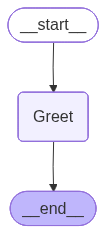

In [17]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
result = graph.invoke({"message": "Bob"})
result['message']

'Hello Bob, how are you?'

In [19]:
def compliment_node(state: AgentState) -> AgentState:
    """ This node is to compliment user """
    state['message'] = state['message'] + ", you are doing great job!"
    return state

In [20]:
graph = StateGraph(AgentState)
graph.add_node("compliment", compliment_node)
graph.set_entry_point("compliment")
graph.set_finish_point("compliment")
graph = graph.compile()

In [22]:
result = graph.invoke({"message": "Bob"})
result['message']

'Bob, you are doing great job!'